# Mathematical Underpinnings - Lab 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}a^2X^2-2\mathbb{E}aXY+\mathbb{E}Y^2=a^2\mathbb{E}X^2-2a\mathbb{E}X(X+\epsilon)+\mathbb{E}(X+\epsilon)^2=$


$=a^2\mathbb{E}X^2-2a\mathbb{E}X^2+\mathbb{E}X\epsilon+\mathbb{E}X^2+2\mathbb{E}X\epsilon+\mathbb{E}\epsilon^2=a^2-2a+1+\sigma^2$


In our task we know $a^* = 1$.

In [1]:
def population_risk(a, sigma_eps):
    return a**2 - 2*a + 1 + sigma_eps**2

### b)

In [6]:
# sampling
def gen_data(n = 50, sigma_2 = 1):
    X = np.random.normal(0, 1, n)
    return X, X + np.random.normal(0, sigma_2, n)

X, y = gen_data()

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [7]:
def empirical_risk(a, x, y):
    return np.mean((a*x-y)**2)

### c)

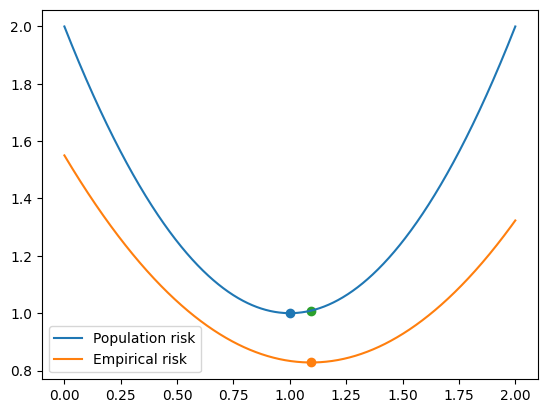

In [18]:
# code
m = 1000
a_range = np.linspace(0,2,m) 
pop = [population_risk(a, 1) for a  in a_range]
emp =  [empirical_risk(a, X, y) for a  in a_range]

    
# plot
plt.plot(a_range, pop, label="Population risk")
plt.plot(a_range, emp, label = "Empirical risk")
plt.scatter([a_range[np.argmin(pop)]],[pop[np.argmin(pop)]])
plt.scatter([a_range[np.argmin(emp)]],[emp[np.argmin(emp)]])
plt.scatter([a_range[np.argmin(emp)]],[pop[np.argmin(emp)]])
plt.legend()
plt.show()

In [19]:
# Best a
a_range[np.argmin(emp)]

1.093093093093093

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [20]:
# excess risk
def excess_risk(a, real_a = 1, sigma_eps = 1):
    return population_risk(a, sigma_eps) - population_risk(real_a, sigma_eps)

In [24]:
# simulations with fixed sample size
m = 1000
n = 50
risk = []

for i in range(200):
    X, y = gen_data(n)
    
    a_range = np.linspace(0,2,m) 
    pop = [population_risk(a, 1) for a  in a_range]
    emp =  [empirical_risk(a, X, y) for a  in a_range]
    risk.append(excess_risk(a_range[np.argmin(emp)]))
print(f"Unconditional excess risk: {np.mean(risk)}")
    

Unconditional excess risk: 0.01890819748677606


In [27]:
# simulations for various sample sizes
unc_risk = {}
for n in range(50, 500, 50):
    risk = []

    for i in range(200):
        X, y = gen_data(n)
        
        a_range = np.linspace(0,2,m) 
        pop = [population_risk(a, 1) for a  in a_range]
        emp =  [empirical_risk(a, X, y) for a  in a_range]
        risk.append(excess_risk(a_range[np.argmin(emp)]))
        
    unc_risk[n] = risk
    

<AxesSubplot: >

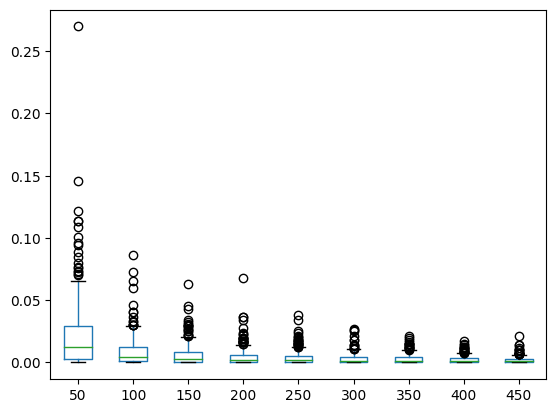

In [34]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
df = pd.DataFrame(unc_risk)
df.boxplot(grid=False)